## <span style="color: #0F749B"> Milwaukee FUSE 25' Guide to Data Cleaning </span>

<p align="center">
  <img src="new_yorker.jpeg" width="300">
</p>

This Jupyter Notebook is a guide towards understanding how to perform data cleaning as well as understand what data looks like when viewing datasets. The goal of this Jupyter Notebook is to achieve the following:
- [x] Be able to look at features and determine which features are numerical or categorical
- [x] Be able to use `pandas` to import a `.csv` file and use pandas to gain insights into the dataset
- [x] Be able to use `matplotlib` to visualize a feature and be able to interpret the skew of the dataset
- [x] Be ale to use `numpy` to perform operations on a feature from a dataset
- [x] Be able to analyse features and determine methods of filling out features with missing values

### <span style="color: #04A4E2"> The Necessary Imports </span>
Before staring anything, we need to first import the necessary python libraries so that we can perform the data cleaning process. The following libraries we need to import are `numpy`, `pandas` and `matplotlib`.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style="color: #0F749B">  Part 1 | Introduction to Pandas </span>
This section covers the basics of Pandas and how to extract data from a dataset, as well as perform other operations on a `.csv` of your choice. Pandas is a power python library that makes data handling seamless.

### <span style="color: #F4AB04"> Loading the Dataset </span>
Now that we've imported the libraries, we can begin loading the dataset. We use `.read_csv()` to load convert our `.csv` file into a Pandas dataframe, which in turn allows us to be able to perform operations using the Pandas library. The `.read_csv()` method takes in a file path as a string.

In [3]:
# load the .csv file as a pandas data frame
titanic_df = pd.read_csv("titanic.csv")

# call the data frame to display it
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### <span style="color: #04A4E2"> Gaining Insights into Data Frame </span>
Suppose you're in a situation where you would like to know more about the dataset, about extract insights such as:
- The statistics from each feature, such as the mean, median or the upper or lower quartiles and etc
- The data type of each feature an determine whether the feature is numerical or categorical

To achieve the first bullet point, we use `.info()` and for the second, we use `.describe()`!

In [4]:
# calling .info() on a pandas data frame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# calling .describe on a pandas data frame
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <span style="color: #F4AB04"> Finding Null Values </span>
Cool! Using `.describe()` and `.info()` gave us insights into the dataset, and we can see that some of our features have missing values. To confirm our suspicions, we can write code that counts the number of null values in a feature.

In [ ]:
# accessing a feature from a data frame 
    # .isnull() checks for null values
    # .sum() counts the number of null values altogether

cabin_null = titanic_df['Cabin'].isnull().sum()
print("Number of Null Values: ", cabin_null)

Number of Null Values:  687


### <span style="color: #04A4E2"> Changing Data Type of a Feature </span>
When you convert a `.csv` file into a Pandas dataframe, it assumes the data type of each feature, hence, there is always a chance for errors. It's always a good practice to check your dataset and confirm the data type.

For example, look at the `Pclass`, where Pandas says it's a numerical feature. While that may be true, it is actually categorical because there are only three unique features, which are `1`, `2` and `3`.

In [10]:
# change data type of the feature to categorical
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

# confirm to see if data type has been changed
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


### <span style="color: #F4AB04"> Filtering Out Data </span>
Suppose you'd like to filter out data from a feature. Let's say we were interested in knowing how many male passengers survived. In this scenario, we're interested in looking at `Sex` and `Survived`.

In [12]:

# creating a new data frame that filters out from the titanic data frame for males who survived
survived_df = titanic_df[(titanic_df['Sex'] == 'male') & titanic_df['Survived'] == 1]

# displaying the new data frame
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


### <span style="color: #04A4E2"> Updating Data in a Feature </span>
Lastly, suppose you're interested in changing the data of the feature. Say you don't like 1's and 0's for the `Survived` feature, and you'd rather have the feature display data as `Survived` or `Dead`.

In [13]:
# use .map() to achieve this
titanic_df['Survived'] = titanic_df['Survived'].map({1: 'Survived', 0: 'Dead'})

# display the data frame
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Dead,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <span style="color: #0F749B">  Part 2 | Introduction to Matplotlib </span>
Suppose we'd like to visualize a feature from a dataset. This is where `matplotlib` comes into play. Matplotlib is a comprehensive library that allows for visualizing data, which in turn allows you to analyze the data visually.

### <span style="color: #F4AB04"> Creating a Barchart </span>
Suppose we'd like to create a barchart of the number of men and women who survived the titanic incident. We can visualize this into a barchart by writing the code below, which in turn allows us to analyze the data.

In [28]:
# extract the men who survived and store into a variable as a number
survived_male_df = titanic_df[(titanic_df['Sex'] == 'male') & titanic_df['Survived'] == 1]
male_survived_count = survived_male_df['Name'].count()
print("Number of Men Who Survived: ", male_survived_count)

# extract the female who survived and store the number into a variable
survived_female_df = titanic_df[(titanic_df['Sex'] == 'female') & titanic_df['Survived'] == 1]
female_survived_count = survived_female_df['Name'].count()
print("Number of Men Who Survived: ", female_survived_count)


Number of Men Who Survived:  577
Number of Men Who Survived:  314


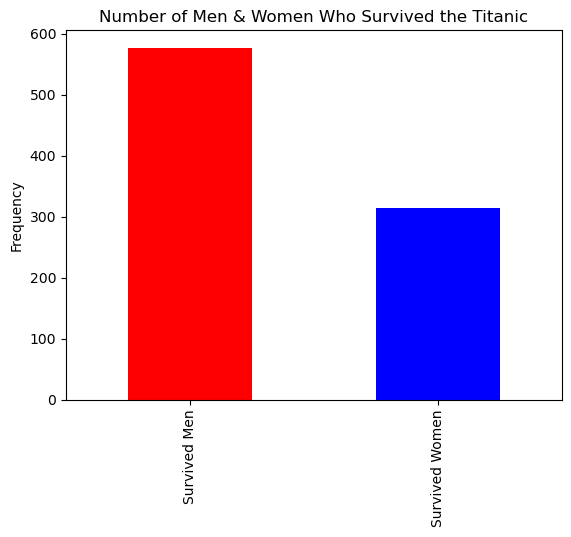

In [39]:
# creating a new data frame
gender_survivors_df = pd.Series({
    'Survived Men' : male_survived_count,
    'Survived Women' : female_survived_count
})

# plot a bar chart
gender_survivors_df.plot(kind='bar', color=['red', 'blue'])

# setting the y axis label
plt.ylabel("Frequency")

# setting the title
plt.title("Number of Men & Women Who Survived the Titanic")

# displaying the chart
plt.show()

### <span style="color: #04A4E2"> Plotting a Feature </span>
Suppose we're interested in the skew of the feature. We'd like to know whether the feature is skewed to the left or skewed to the right, or maybe even assymetrical. The example below is a right skewed graph.

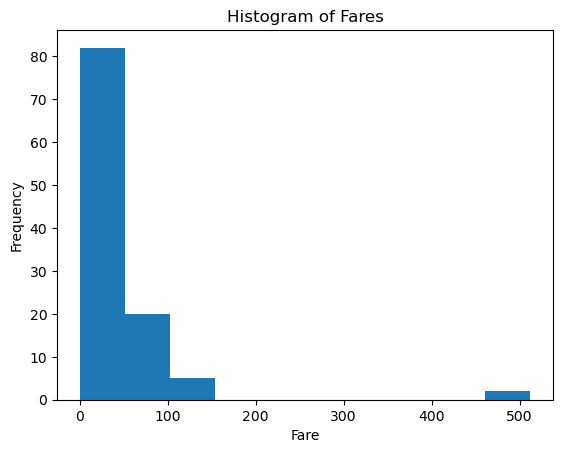

In [45]:
# creating a histogram and setting the title
plt.hist(survived_df['Fare'])
plt.title("Histogram of Fares")

# setting the x and y labels
plt.xlabel("Fare")
plt.ylabel("Frequency")

# displaying the plot
plt.show()

## <span style="color: #0F749B">  Part 3 | Introduction to NumPy </span>
Alright! We can convert our data int a `.csv` file and also visualize the data we're looking at. Now, suppose we'd like to perform operations on our data. This is where `numpy` is a powerful library that allows us to do just that.

### <span style="color: #F4AB04"> Deciding on a Method of Imputation </span>
Suppose we have missing values in a feature within a data frame. To deal with missing values, we need to impute them. But, do we impute with the mean, median or mode? To decide, here are the guidelines:
- if the data is normally distributed, we impute the missing values using the overall mean 
- if the data is skewed to the left or the right, we impute the missing values using the overall median
- if the data is categorical, then we impute using the mode of that feature itself


### <span style="color: #04A4E2"> Imputing Missing Values Example </span>
As a demonstration, we would like to impute the missing values from the `Age` feature. If we were to look back, we know that the feature is numerical, but we need to know the skew, decide on the imputation method, and then impute.

Skew:  0.38910778230082704


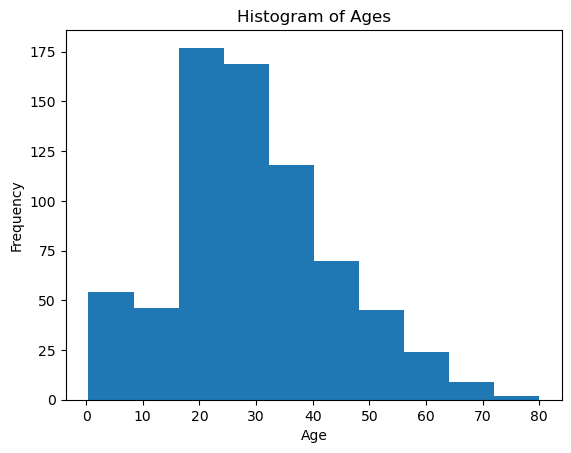

In [ ]:
# finding the skew 
skew_age = titanic_df['Age'].skew()
print("Skew: ", skew_age)

# finding skew using data visualization
# creating a histogram and setting the title
plt.hist(titanic_df['Age'])
plt.title("Histogram of Ages")

# setting the x and y labels
plt.xlabel("Age")
plt.ylabel("Frequency")

# displaying the plot
plt.show()

In [53]:
# since there is a normal distribution, we decide to impute using the overall mean

# finding the mean of the feature
mean_age = np.mean(titanic_df['Age'])
print("Mean Age: ", mean_age)

# impute all missing values using the mean age
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

# perform a check to see if there are any null values in the Age column
age_null_count = titanic_df['Age'].isnull().sum()
print("Number of Null Age Values: ", age_null_count)

Mean Age:  29.69911764705882
Number of Null Age Values:  0


## <span style="color: #0F749B">  Conclusion </span>
As you went through this Jupyter notebook, you now know how to visualize data, deal with data frames, as well as apply simple mathematical operations to data from a `.csv` file!